# Lab 2

## The main question

The datasets chosen for this laboratory project concern activated and terminated employment contracts in Lombardy. 
The goal is to get a prevision on the number of activated and terminated contracts based on parameters such date, educational qualification and geographical area. In this way it is possible to get an overwiew about the labour market based on the input data.

## Imports

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime

## Datasets Analysis

The considered datasets are available on the Lombardy Region website at the following links:

[__Activated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-attivati/qbau-cyuc)

[__Terminated contracts__](https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm)

### Datasets overview

In [2]:
start = datetime.timestamp(datetime.now())
# Loading and showing the first dataset
activated_work = pd.read_csv("Rapporti_di_lavoro_attivati.csv")
# Loading and showing the second dataset
terminated_work = pd.read_csv("Rapporti_di_lavoro_cessati.csv")
stop = datetime.timestamp(datetime.now())
activated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)
terminated_work.rename(columns={'ITALIANO':'NAZIONALITA'}, inplace=True)

In [3]:
print('Time required : '+str((stop - start)/1000))

Time required : 0.04696755194664001


In [4]:
activated_work['TIPOLOGIA'] = 'ATTIVATO'
terminated_work['TIPOLOGIA'] = 'TERMINATO'

In [5]:
total = [activated_work, terminated_work]

result = pd.concat(total)

result_df = pd.DataFrame(result) #check if redundant

In [6]:
result_df.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,TIPOLOGIA
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,ATTIVATO
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,ATTIVATO
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,ATTIVATO
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,ATTIVATO
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,ATTIVATO


In [7]:
newDF = result_df[['DATA', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']]

newDF.head()

,DATA,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
0,09/05/2020,NESSUN TITOLO DI STUDIO,BERGAMO,ATTIVATO
1,12/07/2019,LICENZA MEDIA,BERGAMO,ATTIVATO
2,05/06/2013,LICENZA MEDIA,BERGAMO,ATTIVATO
3,12/03/2010,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,BERGAMO,ATTIVATO
4,06/04/2021,LICENZA MEDIA,BERGAMO,ATTIVATO


In [8]:
tempDF = newDF.copy()
tempDF['DATA'] = pd.to_datetime(tempDF['DATA'], errors = 'coerce', format='%d/%m/%Y')
tempDF['YEAR']= tempDF['DATA'].dt.year
tempDF['MONTH']= tempDF['DATA'].dt.month

In [9]:
newDF = tempDF[['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA', 'TIPOLOGIA']].copy()

In [10]:
newDF.head()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
0,2020.0,5.0,NESSUN TITOLO DI STUDIO,BERGAMO,ATTIVATO
1,2019.0,7.0,LICENZA MEDIA,BERGAMO,ATTIVATO
2,2013.0,6.0,LICENZA MEDIA,BERGAMO,ATTIVATO
3,2010.0,3.0,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,BERGAMO,ATTIVATO
4,2021.0,4.0,LICENZA MEDIA,BERGAMO,ATTIVATO


In [11]:
print('Null Values Count for each feature in Activated')
print(newDF.isnull().sum())

Null Values Count for each feature in Activated
YEAR                   1
MONTH                  1
TITOLOSTUDIO        1020
PROVINCIAIMPRESA       0
TIPOLOGIA              0
dtype: int64


In [12]:
print(newDF.count())

YEAR                13321187
MONTH               13321187
TITOLOSTUDIO        13320168
PROVINCIAIMPRESA    13321188
TIPOLOGIA           13321188
dtype: int64


In [13]:
newDF = newDF.dropna()
print(newDF.isnull().sum())

YEAR                0
MONTH               0
TITOLOSTUDIO        0
PROVINCIAIMPRESA    0
TIPOLOGIA           0
dtype: int64


In [14]:
## Check outliers

In [15]:
TITOLOSTUDIO_le = preprocessing.OrdinalEncoder()
TITOLOSTUDIO_le.fit(newDF['TITOLOSTUDIO'].unique())
newDF['TITOLOSTUDIO'] = TITOLOSTUDIO_le.transform(newDF['TITOLOSTUDIO'])

In [16]:
PROVINCIAIMPRESA_le = preprocessing.OrdinalEncoder()
PROVINCIAIMPRESA_le.fit(newDF['PROVINCIAIMPRESA'].unique())
newDF['PROVINCIAIMPRESA'] = PROVINCIAIMPRESA_le.transform(newDF['PROVINCIAIMPRESA'])

In [17]:
TIPOLOGIA_le = preprocessing.OrdinalEncoder()
TIPOLOGIA_le.fit(newDF['TIPOLOGIA'].unique())
newDF['TIPOLOGIA'] = TIPOLOGIA_le.transform(newDF['TIPOLOGIA'])

In [18]:
newDF.head()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
0,2020.0,5.0,8,0,0
1,2019.0,7.0,6,0,0
2,2013.0,6.0,6,0,0
3,2010.0,3.0,0,0,0
4,2021.0,4.0,6,0,0


In [19]:
newDF.describe()

,YEAR,MONTH,TITOLOSTUDIO,PROVINCIAIMPRESA,TIPOLOGIA
count,1.332017e+07,1.332017e+07,1.332017e+07,1.332017e+07,1.332017e+07
mean,2.015100e+03,6.391604e+00,5.193273e+00,5.624492e+00,2.808488e-01
std,3.591834e+00,3.458765e+00,3.324562e+00,3.133836e+00,4.494138e-01
min,1.973000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012000e+03,3.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
50%,2.015000e+03,6.000000e+00,6.000000e+00,7.000000e+00,0.000000e+00
75%,2.018000e+03,9.000000e+00,8.000000e+00,7.000000e+00,1.000000e+00
max,2.201000e+03,1.200000e+01,1.100000e+01,1.100000e+01,1.000000e+00


In [20]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

#Creating the features dataset and the temperature dataset
training = newDF[['YEAR', 'MONTH', 'TITOLOSTUDIO', 'PROVINCIAIMPRESA']]
results = newDF["TIPOLOGIA"]

#Creating training and validation dataset
train_X, val_X, train_y, val_y = train_test_split(training, results, random_state = 0)

In [21]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [22]:
#Prediction of Values
pred_y = regressor.predict(val_X)

In [23]:
from sklearn.metrics import mean_squared_error

print("MSE: "+str(mean_squared_error(val_y, pred_y)))

MSE: 0.1916462224370178


In [25]:
def plotDataForYear(year):
    for studyTitle in range(12):
        lst = []

        for month in range(1, 13):
            predictedValue = regressor.predict([[year, month, studyTitle, 0]])
            lst.append([month, predictedValue[0], 'Activated'])
            predictedValue = regressor.predict([[year, month, studyTitle, 1]])
            lst.append([month, predictedValue[0], 'Terminated'])

        df = pd.DataFrame(lst, columns = ['Month', 'Result', 'Type'])

        ax = sb.lineplot(x = "Month", y = "Result", hue = 'Type', data = df);
        ax.set_title("Contracts in "+str(year)+" for '"+(TITOLOSTUDIO_le.inverse_transform([studyTitle]))[0]+"'", fontsize = 20)
        plt.show()

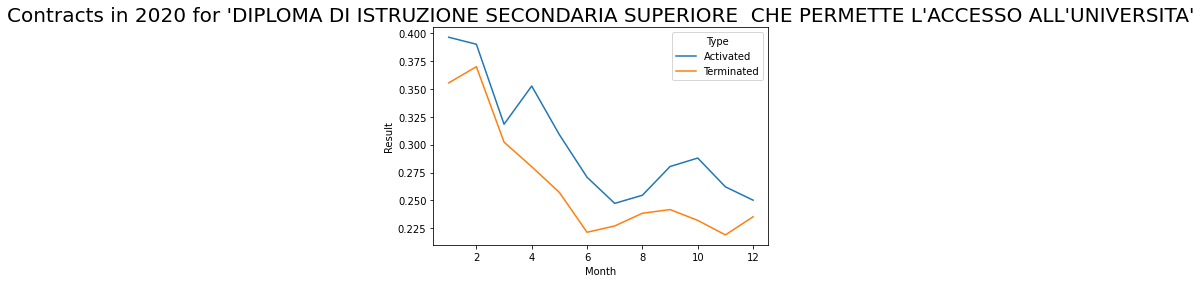

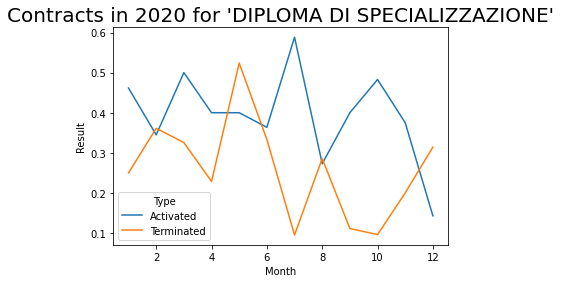

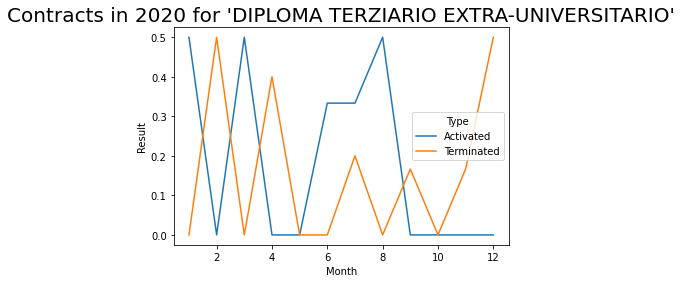

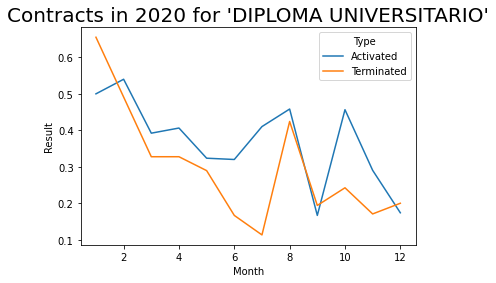

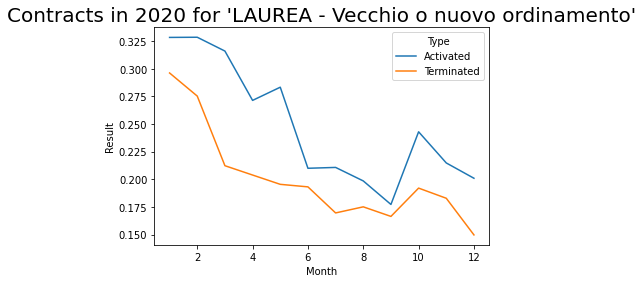

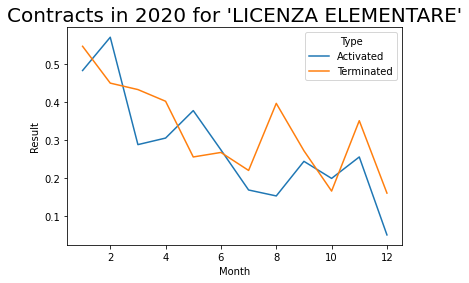

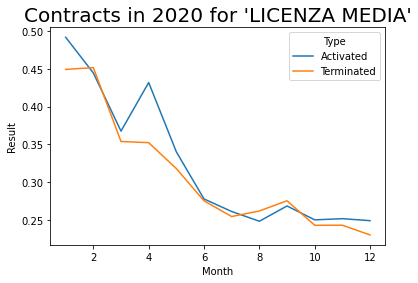

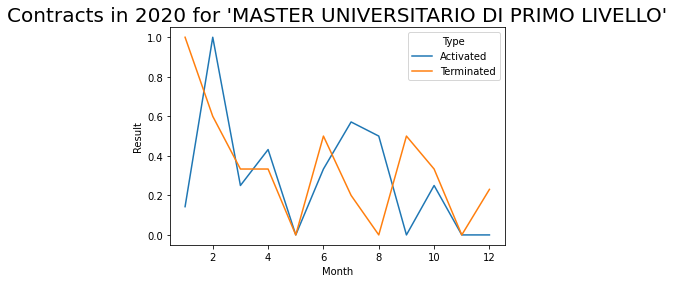

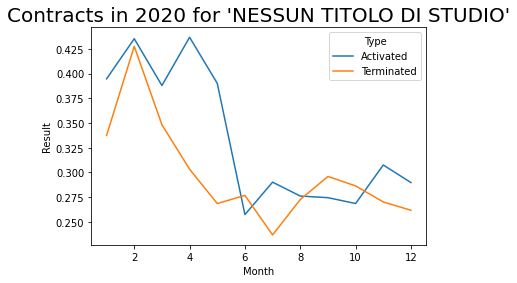

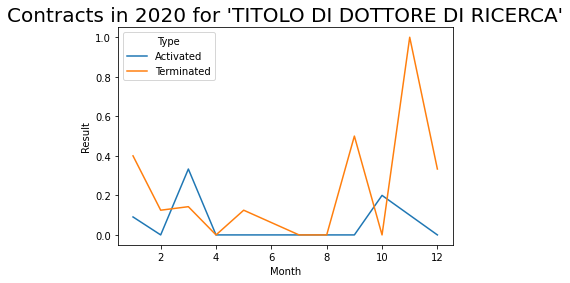

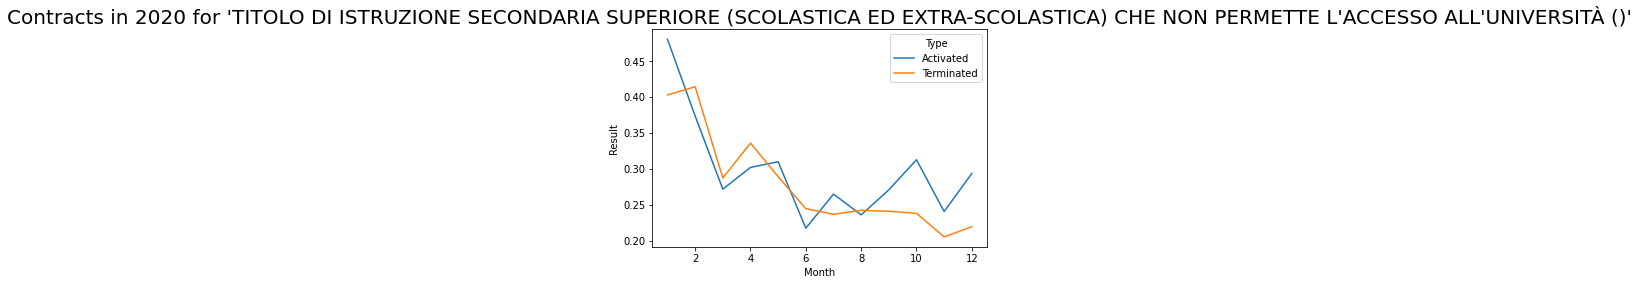

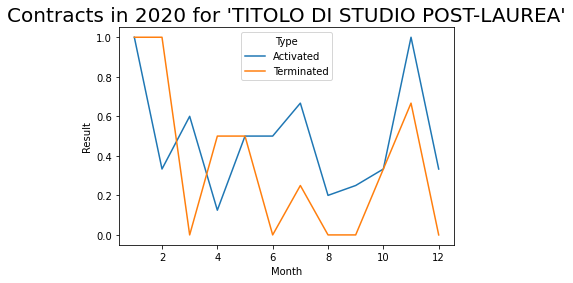

In [26]:
plotDataForYear(2020)

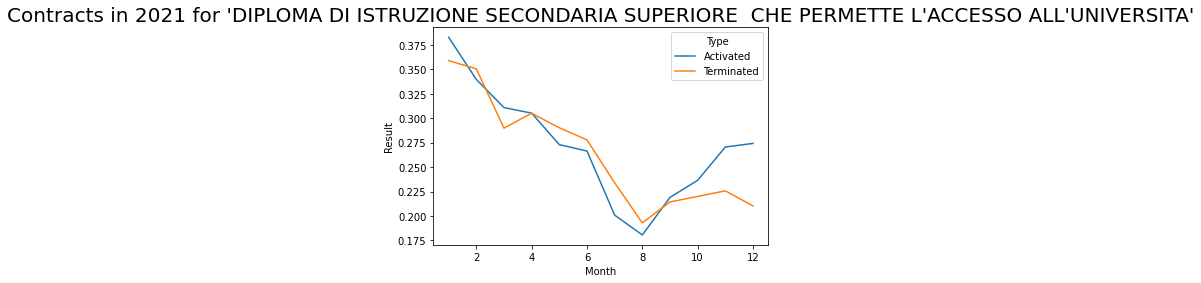

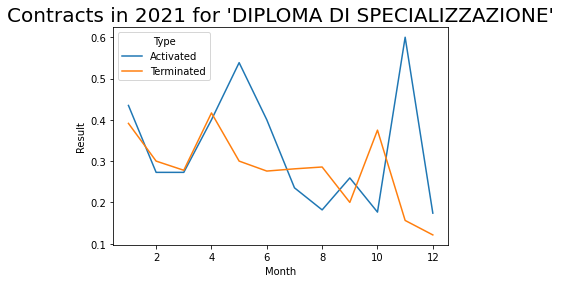

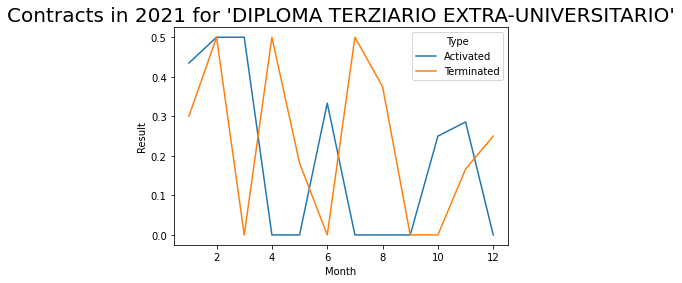

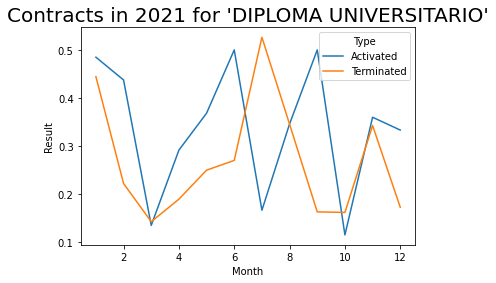

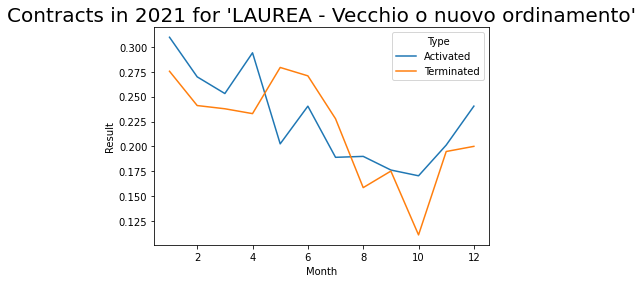

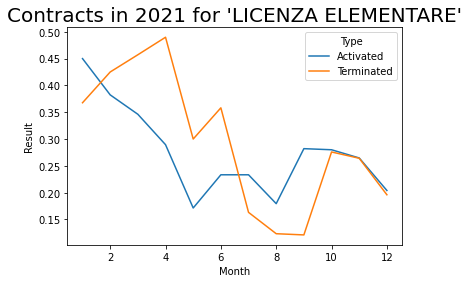

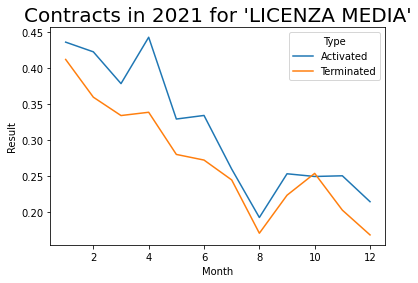

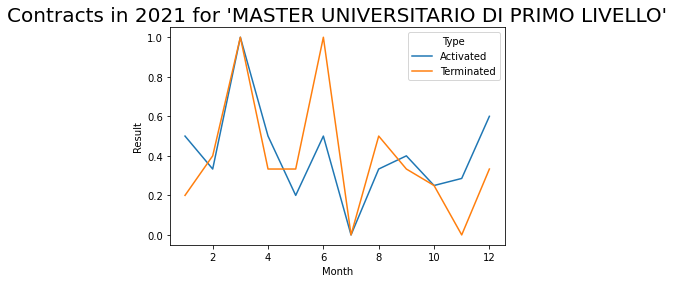

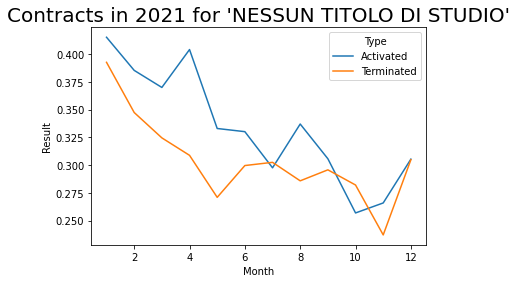

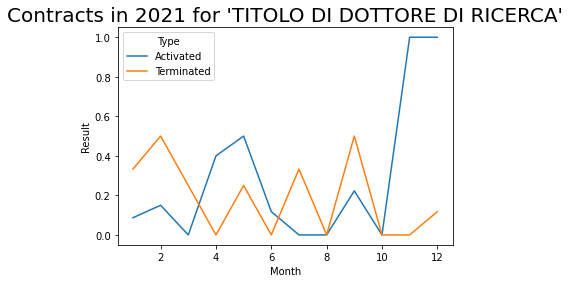

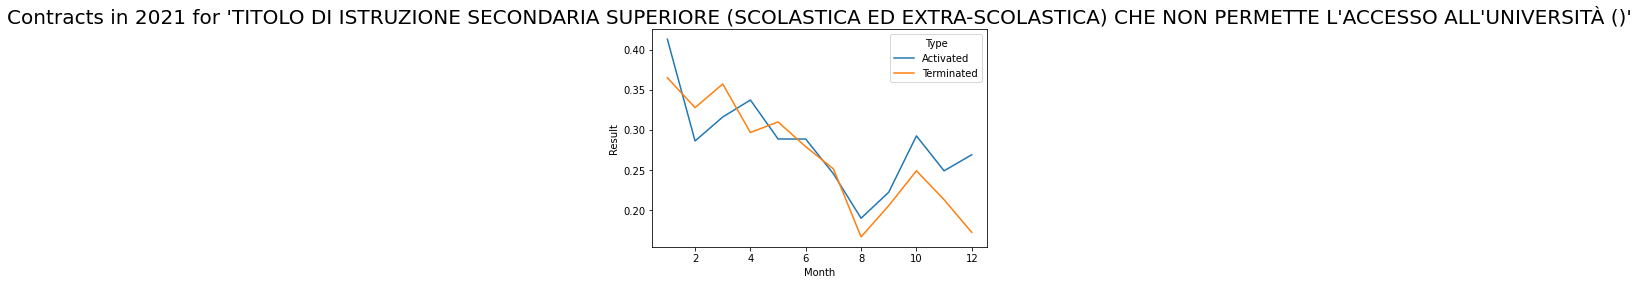

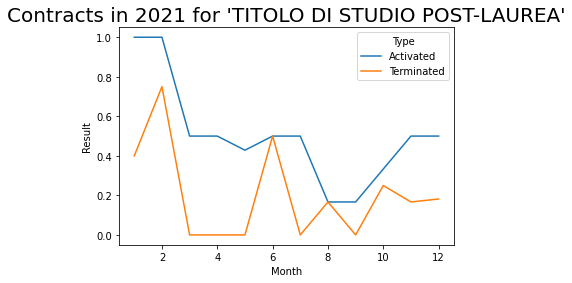

In [27]:
plotDataForYear(2021)

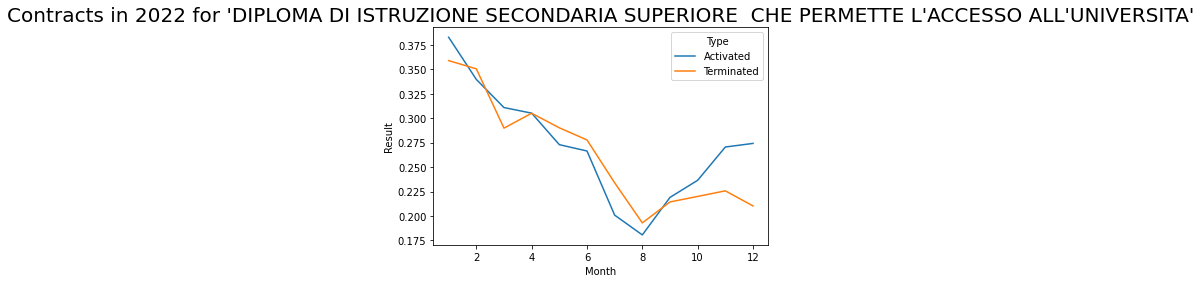

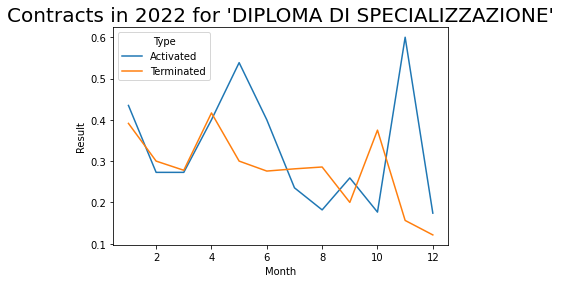

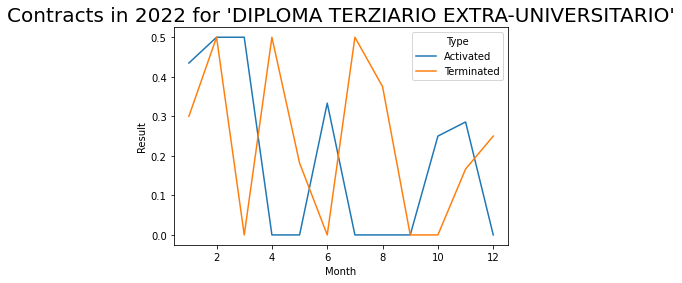

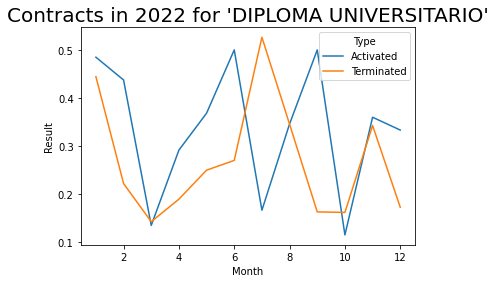

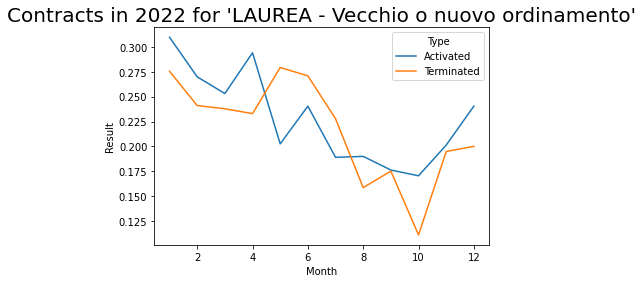

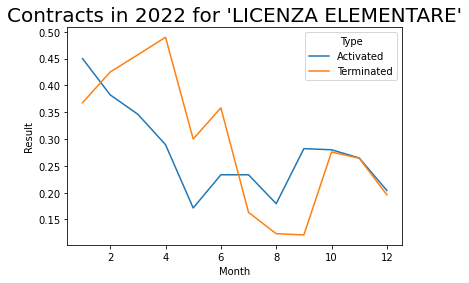

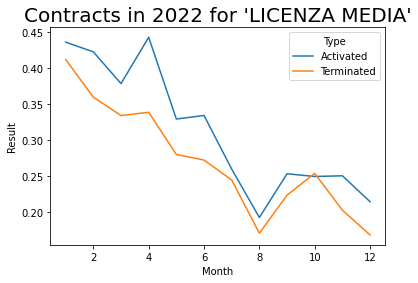

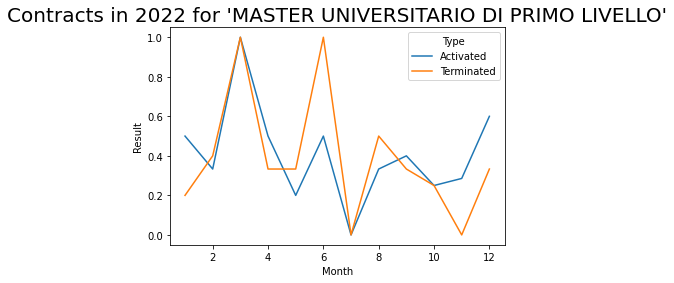

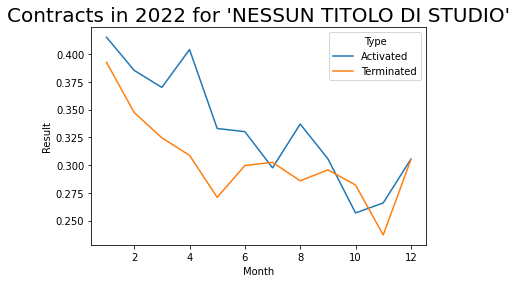

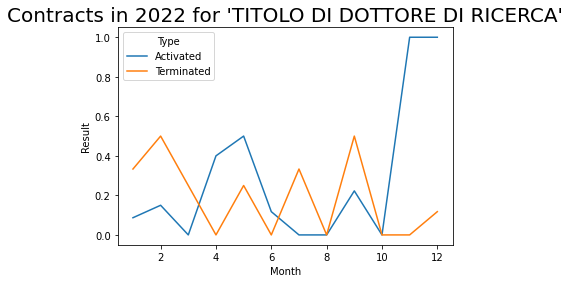

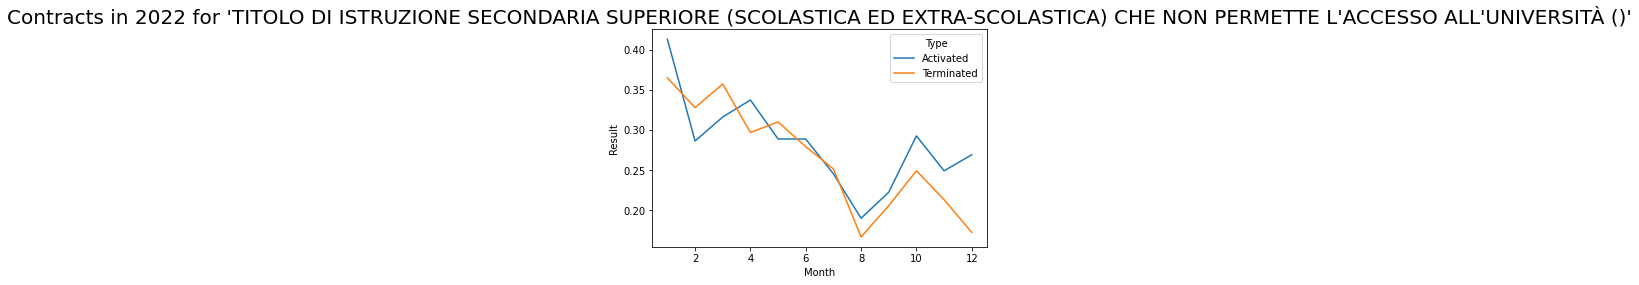

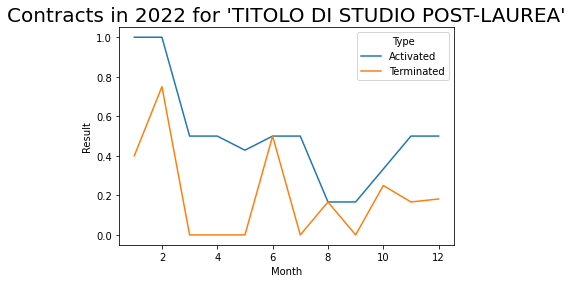

In [28]:
plotDataForYear(2022)

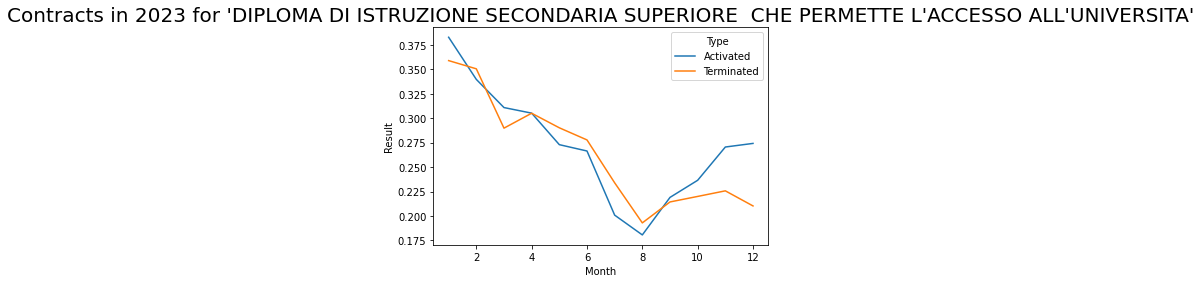

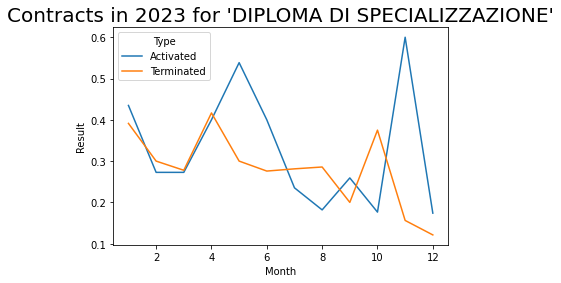

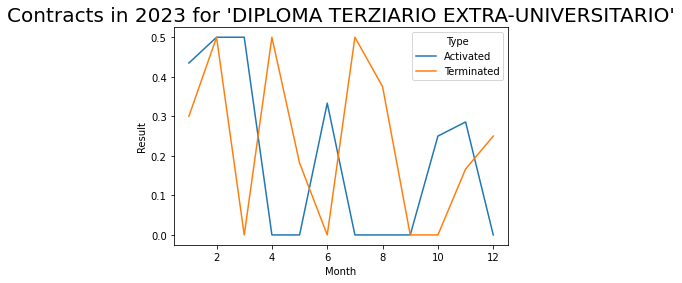

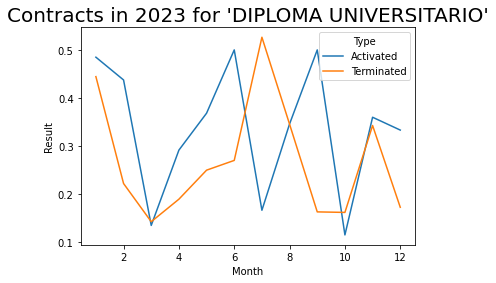

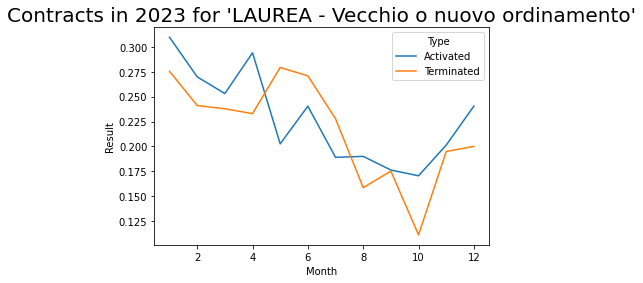

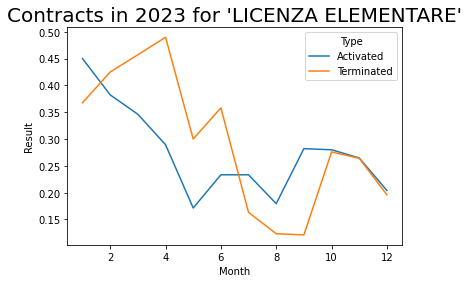

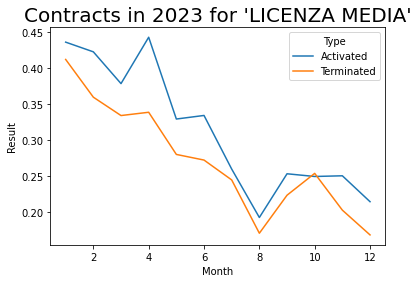

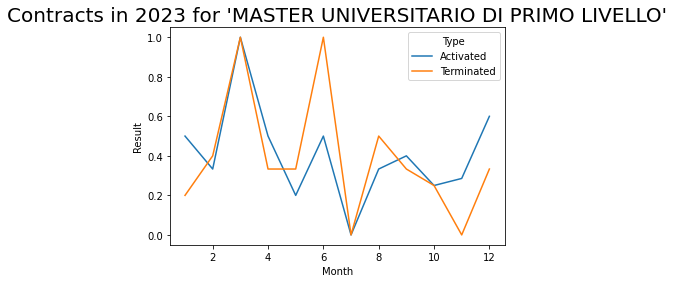

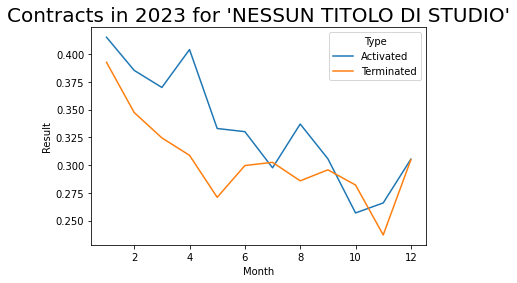

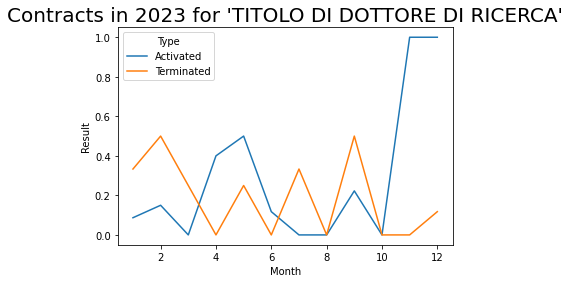

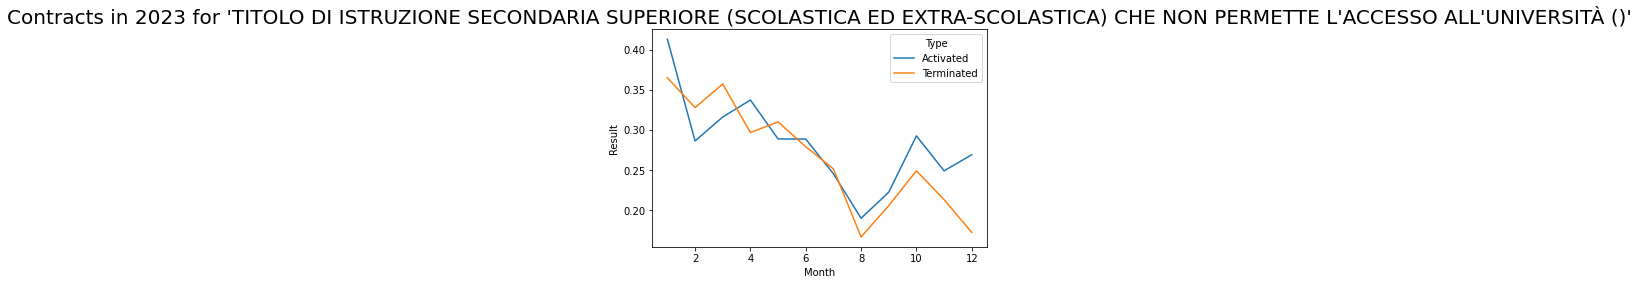

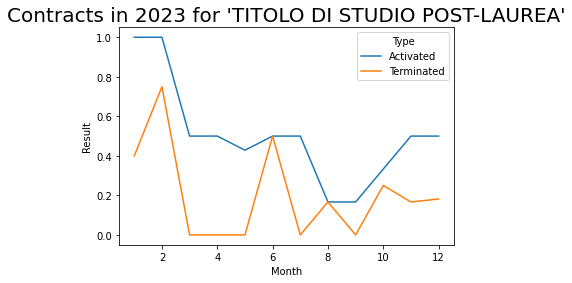

In [29]:
plotDataForYear(2023)